In [8]:
import numpy as np
import time
import os
import sys
import scipy
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.interpolate import interp1d
import pandas as pd
import psutil
import json
from tqdm import tqdm
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
from scipy.linalg import toeplitz
import scipy.linalg as sl
from scipy.signal import convolve2d
from scipy.signal import convolve
import sklearn
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn import linear_model

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm

from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [27]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [10]:
import umap

In [9]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_19/func_0'

In [11]:
t0 = time.time()
save_file = os.path.join(directory, 'pca', 'loadings_(temporal).npy')
pca_loadings = np.load(save_file)
print('Duration: {}'.format(time.time()-t0))

Duration: 0.07200169563293457


### UMAP PARAMETERS:
- n_neighbors: bigger for better large scale features (but could hurt small scale)
- min_dist: lower causes final output to be clumpier

In [13]:
t0 = time.time()
reducer = umap.UMAP(n_neighbors=10)
embedding = reducer.fit_transform(pca_loadings[:,:100])
print('Duration: {}'.format(time.time()-t0))

(4554, 2)

Duration: 38.98444962501526


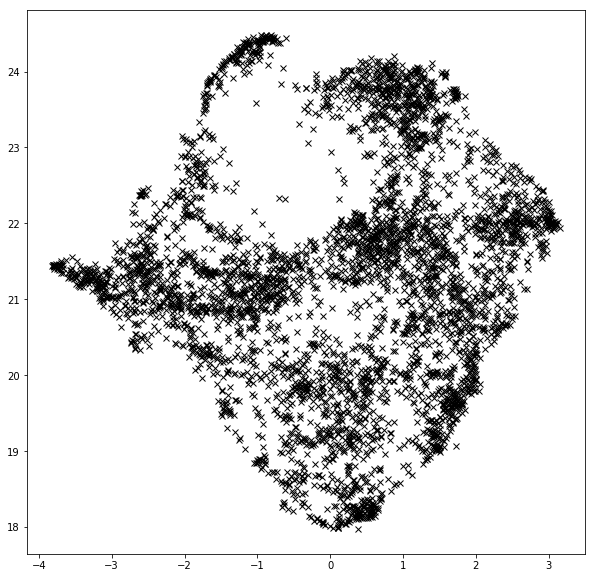

In [21]:
t0 = time.time()
reducer = umap.UMAP(n_neighbors=200,min_dist=0)
embedding = reducer.fit_transform(pca_loadings[:,:100])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
plt.plot(embedding[:,0],
         embedding[:,1],
         linestyle='None',
         color='k',
         marker='x')
#plt.ylim(-50,50)
#plt.xlim(-50,50)

Duration: 25.308186531066895


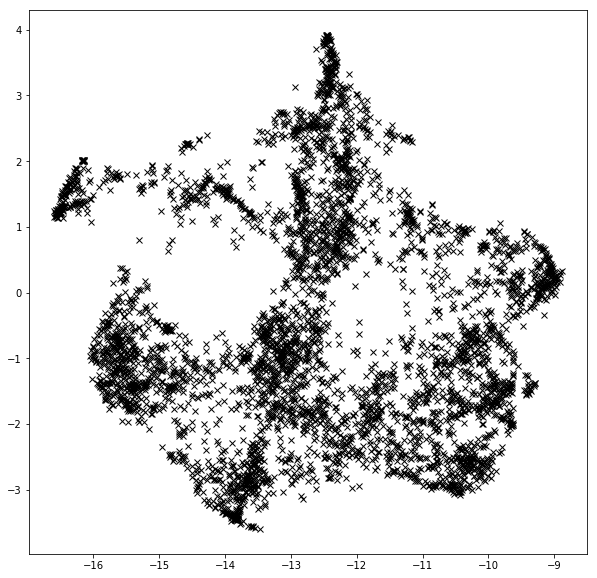

In [22]:
t0 = time.time()
reducer = umap.UMAP(n_neighbors=60,min_dist=0)
embedding = reducer.fit_transform(pca_loadings[:,:100])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
plt.plot(embedding[:,0],
         embedding[:,1],
         linestyle='None',
         color='k',
         marker='x')
#plt.ylim(-50,50)
#plt.xlim(-50,50)

Duration: 25.826372146606445


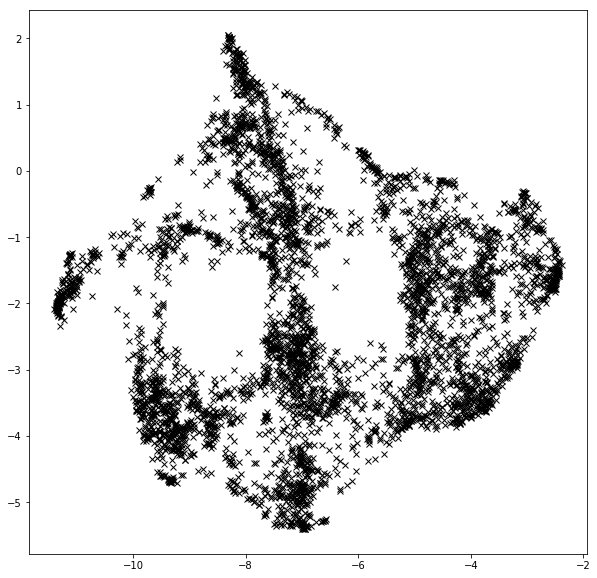

In [23]:
t0 = time.time()
reducer = umap.UMAP(n_neighbors=60,min_dist=0,n_components=3)
embedding = reducer.fit_transform(pca_loadings[:,:50])
print('Duration: {}'.format(time.time()-t0))

plt.figure(figsize=(10,10))
plt.plot(embedding[:,0],
         embedding[:,1],
         linestyle='None',
         color='k',
         marker='x')
#plt.ylim(-50,50)
#plt.xlim(-50,50)

In [24]:
t0 = time.time()
reducer = umap.UMAP(n_neighbors=60,min_dist=0,n_components=3)
X = reducer.fit_transform(pca_loadings[:,:50])
print('Duration: {}'.format(time.time()-t0))

Duration: 26.33419370651245


In [48]:
%matplotlib notebook

In [53]:
%matplotlib inline

(4.343605995178223, 9.343605995178223)

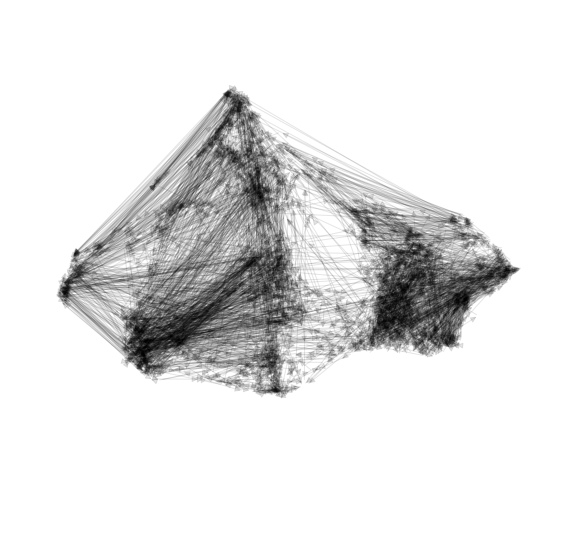

In [54]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=1,zorder=1,color='k',alpha=0.25)
for i in range(X.shape[0]-1):
    a = Arrow3D(X[i:i+2,0],X[i:i+2,1],X[i:i+2,2],
                mutation_scale=12,lw=1,arrowstyle="-|>",
                color='k',alpha=.1)
    ax.add_artist(a)
plt.axis('off')

window = 2.5
center = np.mean(X,axis=0)
ax.set_xlim(center[0]-window,center[0]+window)
ax.set_ylim(center[1]-window,center[1]+window)
ax.set_zlim(center[2]-window,center[2]+window)

In [ ]:
save_path = os.path.join(directory,'tsne','videos','20191221_0')
#os.mkdir(save_path)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X[:,0], X[:,1], X[:,2],marker='o',s=1,zorder=1,color='k',alpha=0.25)
for i in range(X.shape[0]-1):
    if labels[i] == 0:
        alpha = 0
        color='#000000'
    else:
        alpha = 1
        color=colors[labels[i]%len(colors)]
    a = Arrow3D(X[i:i+2,0],X[i:i+2,1],X[i:i+2,2],
                mutation_scale=6,lw=0.25,arrowstyle="-|>",
                color=color,alpha=alpha)
    ax.add_artist(a)
    #ax.plot(X[i:i+2,0],
    #        X[i:i+2,1],
    #        X[i:i+2,2],
    #         alpha=alpha,
    #         lw=1,
    #         #solid_capstyle='butt',
    #         c=colors[lines_clustered.labels_[i]%len(colors)],
    #         zorder=0)
ax.set_ylim(-20,20)
ax.set_xlim(-20,20)
ax.set_zlim(-20,20)
ax.margins(x=0, y=0)
#ax.set_proj_type('ortho')
plt.axis('off')
#ax.view_init(15,angle)

for k,angle in enumerate(range(263,360)):
    print(angle)
    ax.view_init(0,angle)
    fname = os.path.join(save_path, '{0:05d}.png'.format(k))
    plt.savefig(fname,dpi=300,bbox_inches='tight')